# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip
from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO
import csv
import seaborn as sns
import warnings 
import locale
import plotly.express as px


warnings.filterwarnings("ignore")



## Question 1

Use [World Bank's Data Service](https://data.worldbank.org/) to retrieve

* Literacy rates of women (percentage of females ages 15 and above)
* Child mortality rate, under 5 year old. (per 1,000 live births)
* Gini index (Economic Inequality)

1. Plot each dataset for Turkey from earliest date available until this year.
2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 
3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?
4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

In [177]:
# Function for opening zipped csv files which belongs to world bank's data service
def zipped_csv(x):
    with urlopen(x) as url:
        zfile = ZipFile(BytesIO(url.read()))
        
        api_name = None
        for i in zfile.namelist():
            if i[0]== "A":
                api_name = i
            else:
                continue
        
        zdata= zfile.open(str(api_name))
        
        data = pd.read_csv(zdata,skiprows=3)

        data = data.melt(id_vars=["Country Name", "Country Code", 'Indicator Name', 'Indicator Code', 'Unnamed: 66'], 
                                var_name="Year", 
                                value_name="Value")

        data.dropna(subset = ['Value'], inplace=True)
        
    
    return data

In [178]:
#Literacy rates of women (percentage of females ages 15 and above)
literacy = zipped_csv("https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.FE.ZS?downloadformat=csv")

literacy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Unnamed: 66,Year,Value
2690,Barbados,BRB,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,1970,99.251556
2750,Grenada,GRD,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,1970,97.589783
2913,St. Vincent and the Grenadines,VCT,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,1970,95.500000
3353,Middle East & North Africa (excluding high inc...,MNA,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,1972,24.862539
3405,Somalia,SOM,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,1972,3.687170


In [179]:
#Child mortality rate, under 5 year old. (per 1,000 live births)
mortality = zipped_csv("https://api.worldbank.org/v2/en/indicator/SH.DYN.MORT?downloadformat=csv")
mortality.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Unnamed: 66,Year,Value
2,Afghanistan,AFG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,1960,358.2
8,United Arab Emirates,ARE,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,1960,198.0
12,Antigua and Barbuda,ATG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,1960,86.3
13,Australia,AUS,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,1960,24.9
14,Austria,AUT,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,1960,42.9


In [180]:
#Gini index (Economic Inequality)
gini = zipped_csv("https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=csv")
gini.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Unnamed: 66,Year,Value
2085,Sweden,SWE,Gini index,SI.POV.GINI,NaN,1967,34.0
2475,United Kingdom,GBR,Gini index,SI.POV.GINI,NaN,1969,33.7
2961,Canada,CAN,Gini index,SI.POV.GINI,NaN,1971,37.3
3805,United Kingdom,GBR,Gini index,SI.POV.GINI,NaN,1974,30.0
3975,United States,USA,Gini index,SI.POV.GINI,NaN,1974,35.3


**Question 1.1**
1. Plot each dataset for Turkey from earliest date available until this year.


In [181]:
def custom_plot(data,code):
    
    out = data.loc[data["Country Code"].isin(code)]
    
    sns.set(rc={'figure.figsize':(30,8)})

    sns.lineplot(x=out['Year'], y=out['Value'], ci=None, hue = out['Country Code'],palette="Set1")



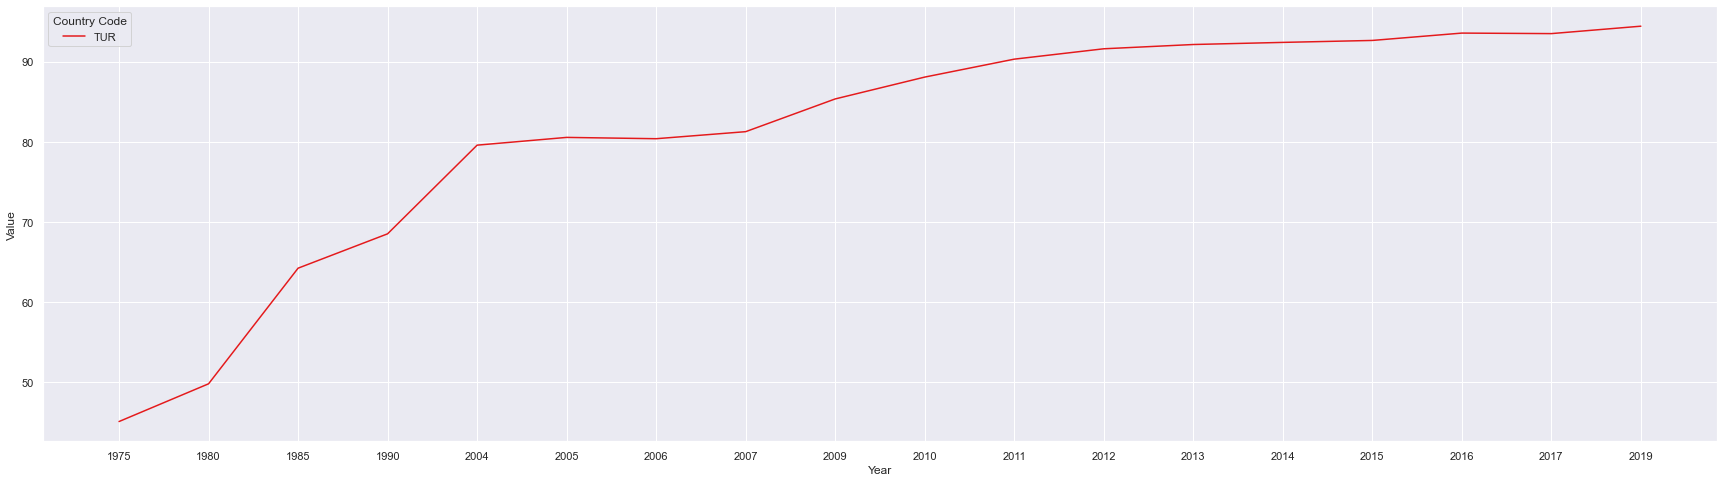

In [182]:

custom_plot(literacy, ["TUR"])

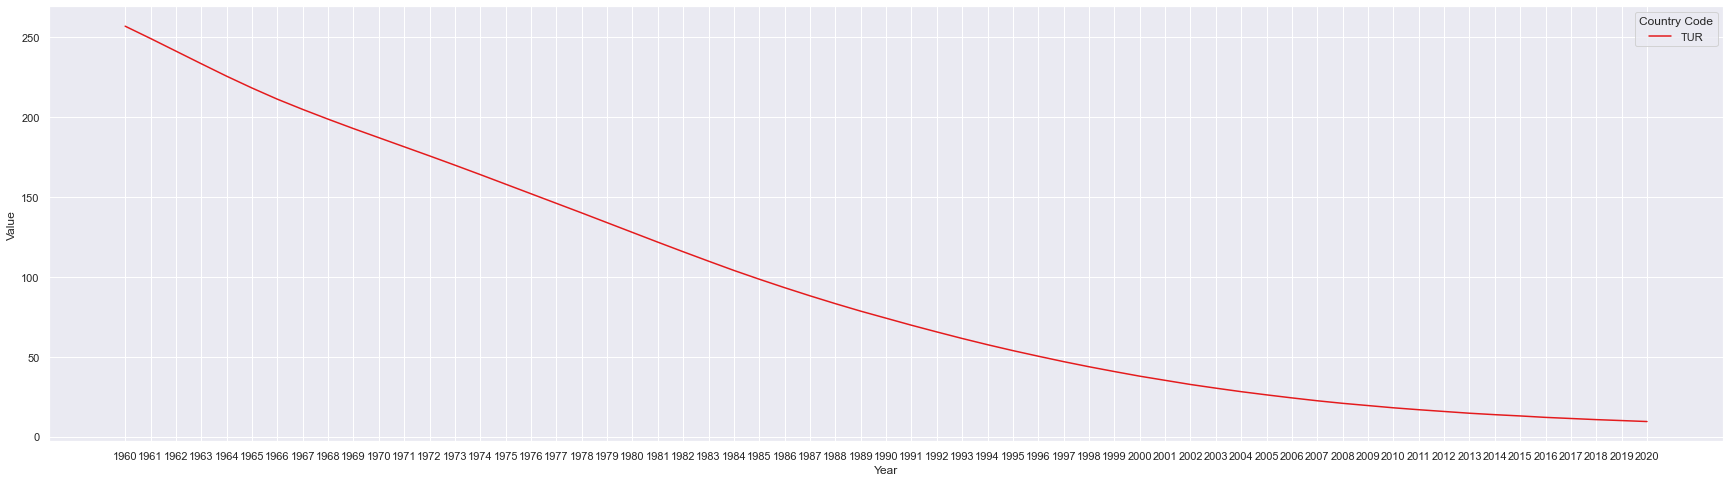

In [183]:
custom_plot(mortality,["TUR"])


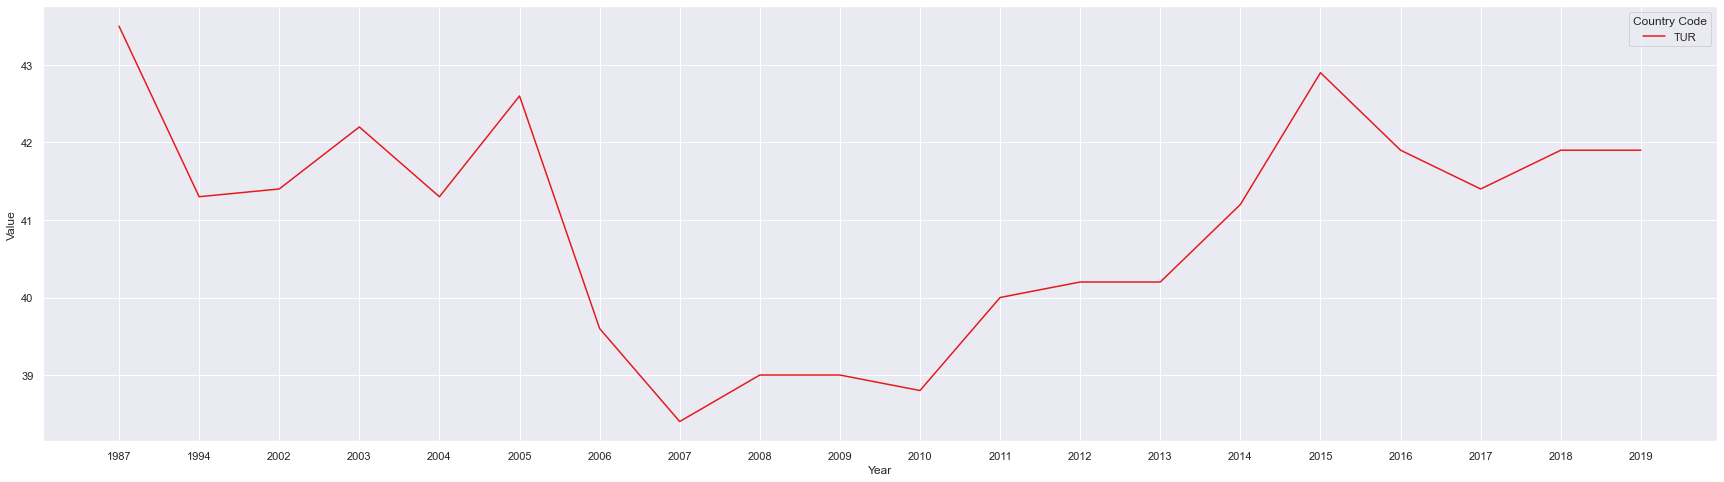

In [184]:
custom_plot(gini,["TUR"])


**Question 1.2**
2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 


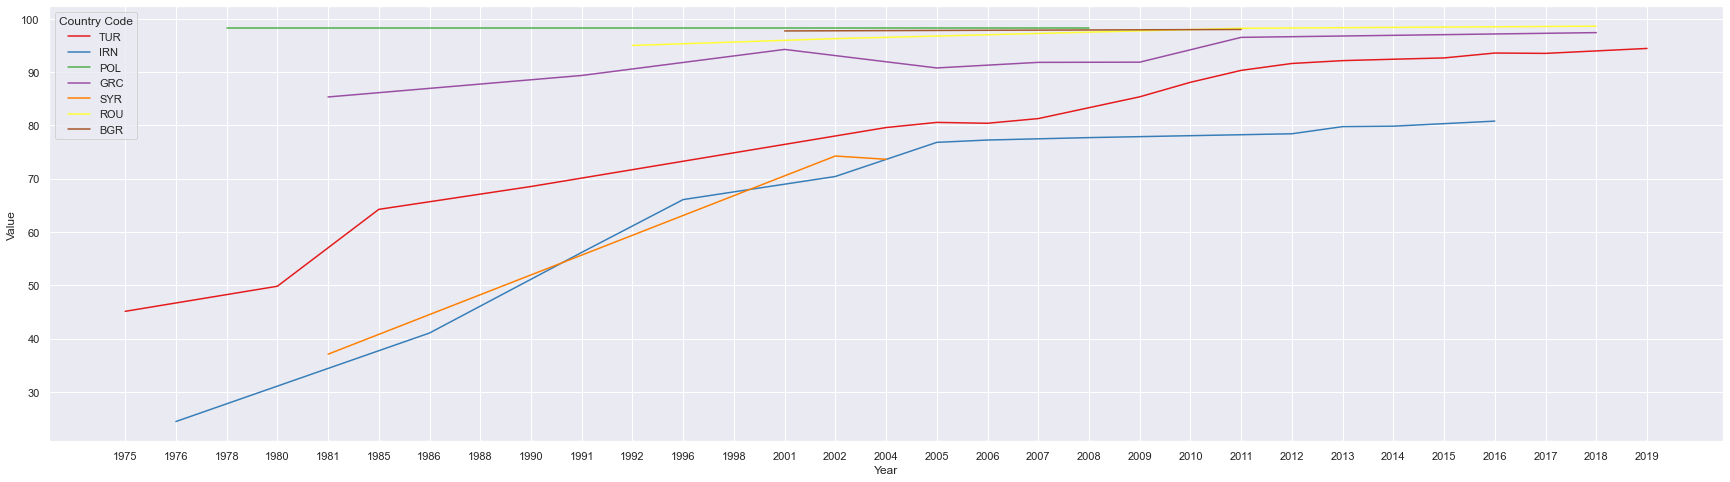

In [185]:
codes = ["TUR","GRC","BGR","POL","IRN", "ROU", "SYR"]
custom_plot(literacy,codes)



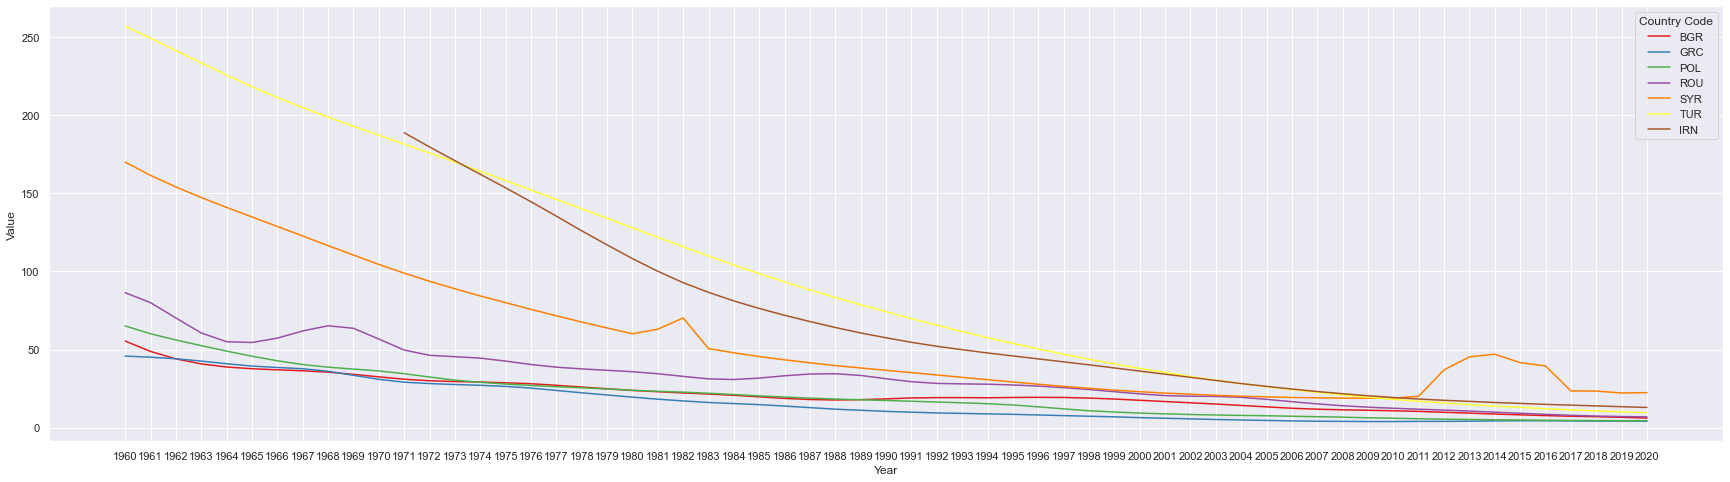

In [186]:
custom_plot(mortality,codes)


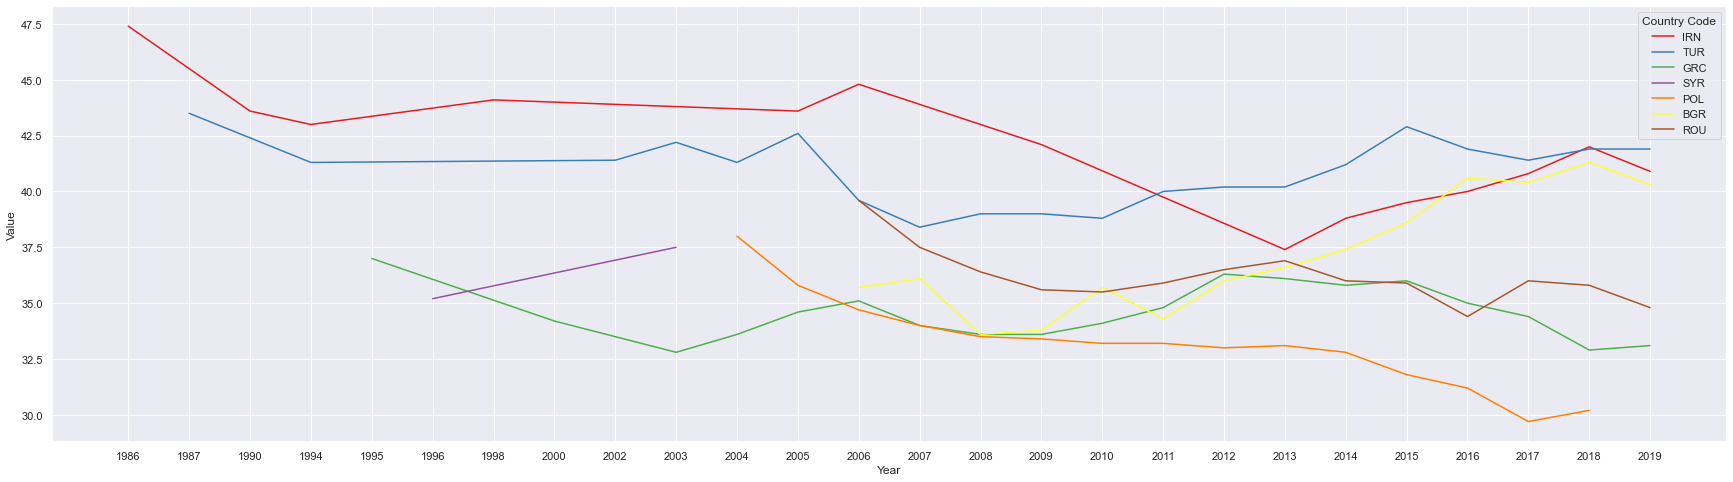

In [187]:
custom_plot(gini,codes)


**Question 1.3**
3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?

- Female literacy rate and child mortality rate for Turkey are inversely proportional


In [188]:
def vs_scatter(data1,data2,label1,label2,code,var):

    X = data1.loc[data1['Country Code']==code]
    Y = data2.loc[data2['Country Code']==code]
    
    X_Y_compare = Y.merge(X, how='right', on=var)
    X_Y_scatter = plt.scatter(X_Y_compare['Value_x'], X_Y_compare['Value_y'])
    
    plt.xlabel(str(label1))
    plt.ylabel(str(label2))

    X_Y_scatter

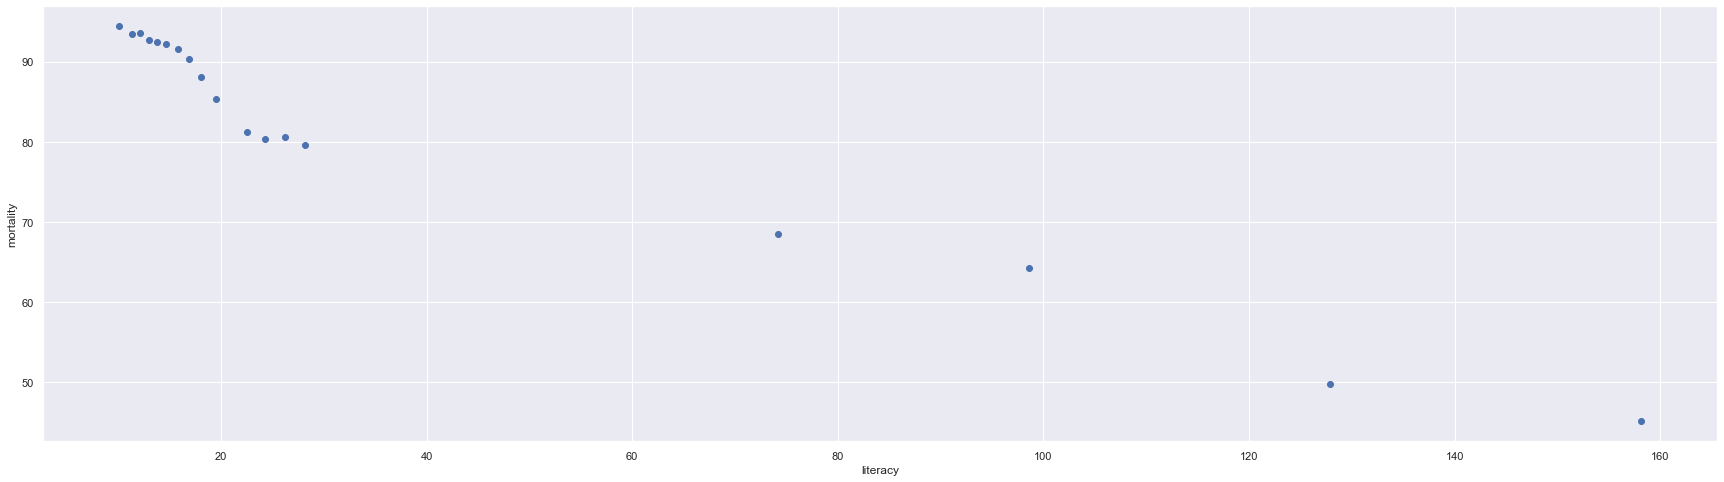

In [189]:
vs_scatter(literacy,mortality,"literacy","mortality","TUR","Year")

**Question 1.4**
4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

- Female literacy rate and gini index for Turkey may be proportional but there is couple of outliers


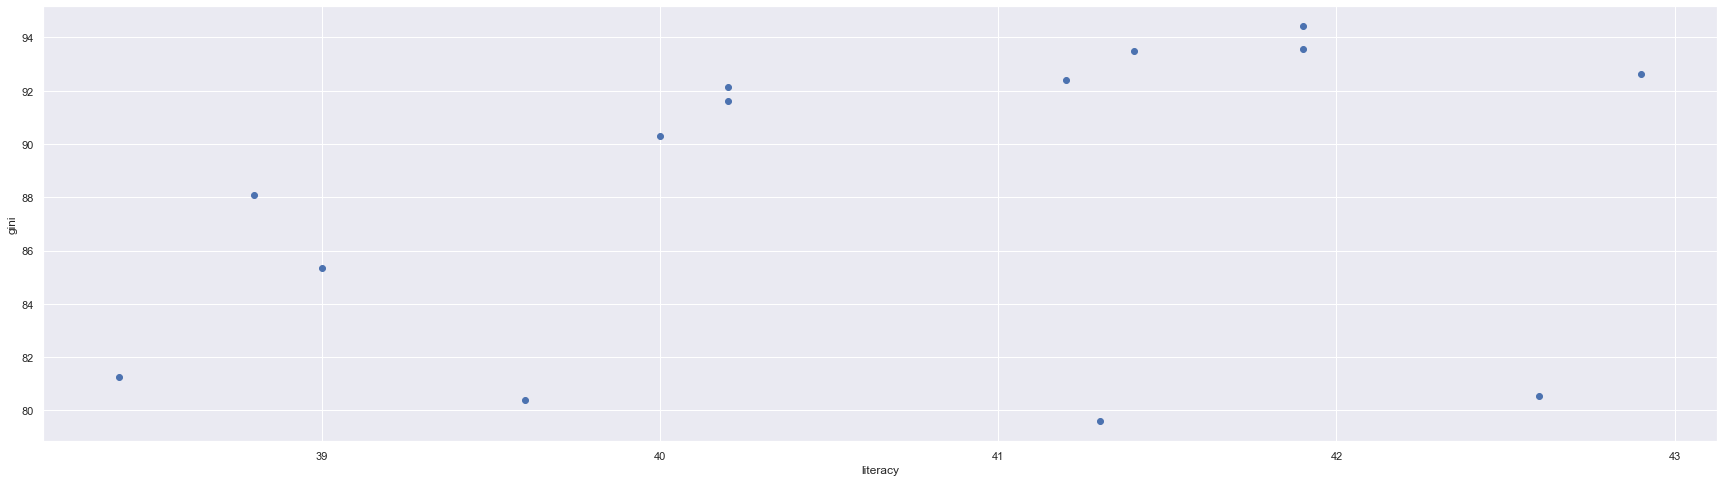

In [190]:
vs_scatter(literacy,gini,"literacy","gini","TUR","Year")


**Question 1.5**
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

- Child mortality rate and gini index for Turkey possibly related but because of having lack of data it seems unrelated

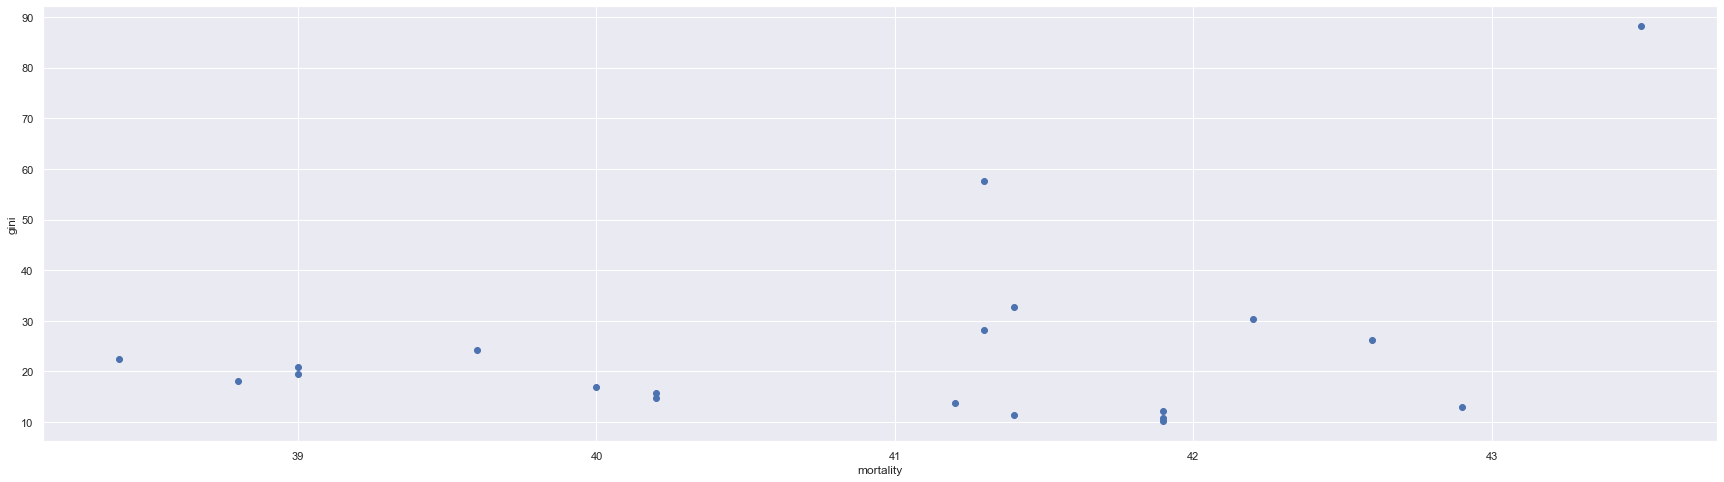

In [191]:
vs_scatter(mortality,gini,"mortality","gini","TUR","Year")



## Question 2

Use Istanbul Municipality Data Server to retrieve the data on [Rail Transportation Data](https://data.ibb.gov.tr/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari).

1. Explore the dataset and explain each column.
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.
3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.
4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form

    {Station Name: probability that the specific age bracket uses the station}
5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.
6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

In [200]:

with urlopen("https://data.ibb.gov.tr/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/7aec630d-2757-4da0-97f1-71b140abd818/download/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx") as url:
    data = pd.read_excel(url.read())


data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,<20


**Question 2.2**
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.

- My solution is simply placing dot next to second number if data is integer, if not it does nothing or cleans the unwanted formats. 

In [201]:
def fix_coord(x):
    if isinstance(x, float) == True:
        pass
    elif isinstance(x, int) == True:
        newX = float(str(x)[:2] + "." + str(x)[2:])
        x = newX
    elif isinstance(x, str) == True:
        x = None
    else:
        pass

    return x


In [202]:
for i in range(data.shape[0]):
    data["latitude"][i] = fix_coord(data["latitude"][i])
    data["longitude"][i] = fix_coord(data["longitude"][i])
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,<20


In [ ]:

sns.set(rc={'figure.figsize':(20,20)})

sns.lineplot(x=data['transaction_month'], y=data['passanger_cnt'], ci=None, hue = data['station_name'],palette="Set1")


In [222]:


sns.scatterplot(data=data, x="latitude", y="longitude", size="passanger_cnt", legend=False, sizes=(20, 2000))


ValueError: Could not interpret value `latitude` for parameter `x`

In [208]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')


Error: unsupported locale setting

In [221]:
# libraries
from gettext import install
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # data set

# data
data = gapminder.loc[gapminder.year == 2007]

data["pop"]
# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=(20, 2000))

# show the graph


11      31889923
23       3600523
35      33333216
47      12420476
59      40301927
          ...   
1655    85262356
1667     4018332
1679    22211743
1691    11746035
1703    12311143
Name: pop, Length: 142, dtype: int64

# Question 3

For this question use Yahoo Finance API via [yfinance](https://pypi.org/project/yfinance/) library. Retrieve the data for Microsoft [MSFT], Apple [AAPL] and NASDAQ-100 [NDX]. from January 1, 2000.

1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 
2. Merge the series you obtain in Step 1 into a single pandas dataframe.
3. Plot the histograms of results you obtained above (use 10 bins).
4. Plot all three series in a single plot to compare. Do you see a relationship? 
5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.